<p style="text-align:center; font-size:24px; font-weight:bold;">Global Cybersecurity Threats (2015-2024)</p>
<p style="text-align:center;">Il dataset "Global Cybersecurity Threats (2015-2024)" offre una panoramica completa dei principali attacchi informatici registrati a livello mondiale dal 2015 al 2024, catturando informazioni dettagliate su 3000 incidenti. I dati rivelano che settori critici come quello bancario, sanitario e delle telecomunicazioni hanno subito il maggior numero di attacchi, con vastissime perdite finanziarie che in alcuni casi superano i 90 milioni di dollari per singolo incidente. Paesi come Brasile, India e Gran Bretagna emergono come i più colpiti, mentre tecniche di attacco come DDoS, phishing e SQL injection dominano il panorama delle minacce.
</p>

---

![Testo alternativo](assets/image/iStock-1271613373.jpg)

# Indice della presentazione

* Importazione e anteprima del dataset
* Mappe coropletiche e heatmap
* Grafici generici
* Trend annuali
* Numero di attacchi per paese
* Fit grafici e mode
* Analisi predittiva

# Importiamo le librerie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go

# Carichiamo il dataset (con handling degli errori)

In [2]:
try:
    df = pd.read_csv("assets/Global_Cybersecurity_Threats_2015-2024 - edit.csv")
except FileNotFoundError:
    print("Errore: il dataset non è stato trovato.")
except pd.errors.EmptyDataError:
    print("Errore: il file è vuoto.")
except pd.errors.ParserError:
    print("Errore: problema nel parsing del CSV.")
except Exception as e:
    print(f"Si è verificato un errore imprevisto: {e}")
else:
    print("File caricato correttamente.")

File caricato correttamente.


# Controllo del dataset

D'ora in poi ci si riferirà al dataset come "df"

In [3]:
from IPython.display import display, HTML

display(HTML('<span style="color:cyan; font-weight:bold;">dimensioni df</span>'))
print(f"{df.shape}\n")

display(HTML('<span style="color:green; font-weight:bold;">informazioni df</span>'))
df.info()
print()

display(HTML('<span style="color:orange; font-weight:bold;">elementi nulli nel df</span>'))
print(f"{df.isnull().sum()}\n")

display(HTML('<span style="color:magenta; font-weight:bold;">statistiche (generali) del df</span>'))
print(f"{df.describe()}\n")


(3000, 10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB



Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64



              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              19.000000  
50%               

# Anteprima del dataset (prime 10 righe)

In [4]:
df.head(10).style\ #Css properties
    .background_gradient(cmap="PuBu", subset=['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)'])\
    .set_caption("Anteprima del Dataset - tabella")\
    .set_properties(**{
        'border': '1px solid black',
        'text-align': 'center',
        'font-family': 'Arial'
    })\
    .highlight_max(color="#E72525", subset=['Financial Loss (in Million $)'])\
    .highlight_min(color="#16D316", subset=['Financial Loss (in Million $)'])\
    .format({
        'Financial Loss (in Million $)': "${:,.2f}",
        'Number of Affected Users': "{:,.0f}",
        'Incident Resolution Time (in Hours)': "{:.1f} ore"
    })\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4472C4'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]
    }])

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,$80.53,"773,169",Hacker Group,Unpatched Software,VPN,63.0 ore
1,China,2019,Ransomware,Retail,$62.19,"295,961",Hacker Group,Unpatched Software,Firewall,71.0 ore
2,India,2017,Man-in-the-Middle,IT,$38.65,"605,895",Hacker Group,Weak Passwords,VPN,20.0 ore
3,UK,2024,Ransomware,Telecommunications,$41.44,"659,320",Nation-state,Social Engineering,AI-based Detection,7.0 ore
4,Germany,2018,Man-in-the-Middle,IT,$74.41,"810,682",Insider,Social Engineering,VPN,68.0 ore
5,Germany,2017,Man-in-the-Middle,Retail,$98.24,"285,201",Unknown,Social Engineering,Antivirus,25.0 ore
6,Germany,2016,DDoS,Telecommunications,$33.26,"431,262",Insider,Unpatched Software,VPN,34.0 ore
7,France,2018,SQL Injection,Government,$59.23,"909,991",Unknown,Social Engineering,Antivirus,66.0 ore
8,India,2016,Man-in-the-Middle,Banking,$16.88,"698,249",Unknown,Social Engineering,VPN,47.0 ore
9,UK,2023,DDoS,Healthcare,$69.14,"685,927",Hacker Group,Unpatched Software,Firewall,58.0 ore


Ora che abbiamo introdotto il dataset, possiamo procedere con l'esecuzione di grafici e tabelle più approfondite per comprendere meglio le statistiche dietro gli attacchi informatici nell'arco temporale dal 2015 al 2024.

# Mappae globali - coropletiche

In [5]:
FONT_FAMILY = "Arial, sans-serif"
TITLE_SIZE = 20
LABEL_SIZE = 14
FIGURE_HEIGHT = 500
FIGURE_WIDTH = 1000

COLORS = {
    'users': ['#fff5f0', '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a', '#ef3b2c', '#cb181d', '#99000d'],
    'financial': ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594'],
    'response': ['#fcfbfd', '#efedf5', '#dadaeb', '#bcbddc', '#9e9ac8', '#807dba', '#6a51a3', '#4a1486']
}

df_users = df.groupby('Country')['Number of Affected Users'].sum().reset_index()

fig_users = go.Figure(data=go.Choropleth(
    locations=df_users['Country'],
    z=df_users['Number of Affected Users'],
    locationmode='country names',
    colorscale=COLORS['users'],
    autocolorscale=False,
    zmin=140000000,                   # min value
    zmax=180000000,
    text=df_users['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar=dict(
        title=dict(
            text="<b>Affected Users</b><br>(Millions)",
            font=dict(size=LABEL_SIZE, family=FONT_FAMILY)
        ),
        thickness=15,
        len=0.7,
        x=1.02,
        tickfont=dict(size=12, family=FONT_FAMILY),
        tickformat=".1s"
    )
))


fig_users.update_layout(
    title=dict(
        text='<b>Global Cybersecurity Impact: Users Affected by Cyber Attacks</b><br><sup>Cumulative data from 2015-2024</sup>',
        x=0.5,
        font=dict(size=TITLE_SIZE, family=FONT_FAMILY, color='#2c3e50')
    ),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='#34495e',
        coastlinewidth=1,
        projection_type='equirectangular',
        bgcolor='rgba(0,0,0,0)',
        showlakes=True,
        lakecolor='#ecf0f1'
    ),
    width=FIGURE_WIDTH,
    height=FIGURE_HEIGHT,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family=FONT_FAMILY),
    margin=dict(l=0, r=0, t=80, b=0)
)

fig_users.show()

df_loss = df.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index()

fig_loss = go.Figure(data=go.Choropleth(
    locations=df_loss['Country'],
    z=df_loss['Financial Loss (in Million $)'],
    locationmode='country names',
    colorscale=COLORS['financial'],
    autocolorscale=False,
    text=df_loss['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar=dict(
        title=dict(
            text="<b>Financial Loss</b><br>(Million USD)",
            font=dict(size=LABEL_SIZE, family=FONT_FAMILY)
        ),
        thickness=15,
        len=0.7,
        x=1.02,
        tickfont=dict(size=12, family=FONT_FAMILY),
        tickformat="$,.0f"
    )
))


fig_loss.update_layout(
    title=dict(
        text='<b>Global Cybersecurity Impact: Financial Losses from Cyber Attacks</b><br><sup>Cumulative losses from 2015-2024</sup>',
        x=0.5,
        font=dict(size=TITLE_SIZE, family=FONT_FAMILY, color='#2c3e50')
    ),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='#34495e',
        coastlinewidth=1,
        projection_type='equirectangular',
        bgcolor='rgba(0,0,0,0)',
        showlakes=True,
        lakecolor='#ecf0f1'
    ),
    width=FIGURE_WIDTH,
    height=FIGURE_HEIGHT,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family=FONT_FAMILY),
    margin=dict(l=0, r=0, t=80, b=0)
)

fig_loss.show()

df_response = df.groupby('Country')['Incident Resolution Time (in Hours)'].mean().reset_index()

fig_response = go.Figure(data=go.Choropleth(
    locations=df_response['Country'],
    z=df_response['Incident Resolution Time (in Hours)'],
    locationmode='country names',
    colorscale=COLORS['response'],
    autocolorscale=False,
    text=df_response['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar=dict(
        title=dict(
            text="<b>Response Time</b><br>(Hours)",
            font=dict(size=LABEL_SIZE, family=FONT_FAMILY)
        ),
        thickness=15,
        len=0.7,
        x=1.02,
        tickfont=dict(size=12, family=FONT_FAMILY),
        tickformat=".1f"
    )
))

fig_response.update_layout(
    title=dict(
        text='<b>Global Cybersecurity Response: Average Incident Resolution Time</b><br><sup>Mean response time from 2015-2024</sup>',
        x=0.5,
        font=dict(size=TITLE_SIZE, family=FONT_FAMILY, color='#2c3e50')
    ),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='#34495e',
        coastlinewidth=1,
        projection_type='equirectangular',
        bgcolor='rgba(0,0,0,0)',
        showlakes=True,
        lakecolor='#ecf0f1'
    ),
    width=FIGURE_WIDTH,
    height=FIGURE_HEIGHT,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family=FONT_FAMILY),
    margin=dict(l=0, r=0, t=80, b=0)
)

fig_response.show()

In [6]:
treemap1 = px.treemap(
    df, 
    path=["Attack Type"], 
    values="Financial Loss (in Million $)", 
    title="Financial Loss by Attack Type",
    color="Financial Loss (in Million $)", 
    color_continuous_scale="Reds"
)
treemap1.show()

# Grafici

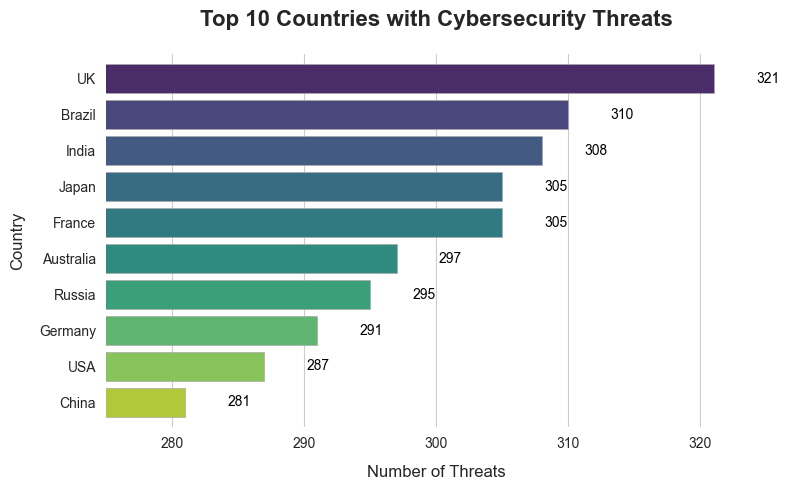

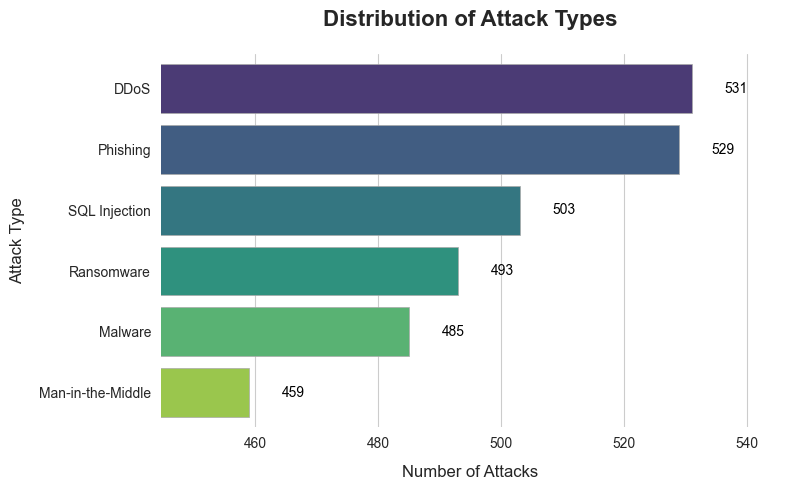

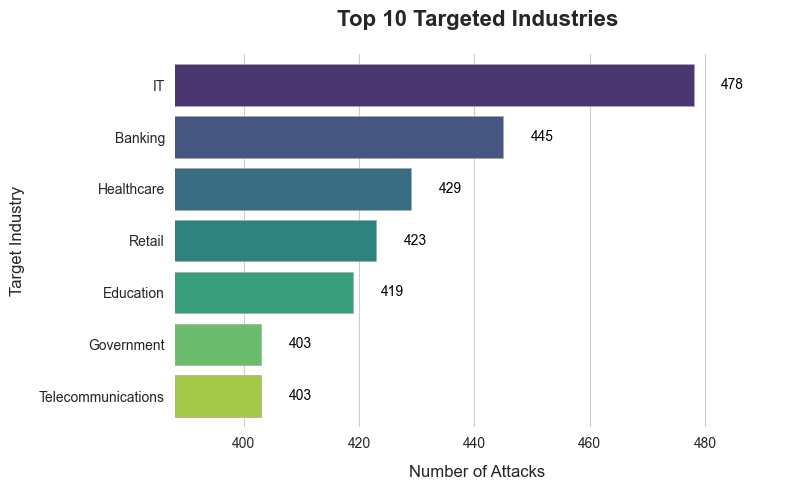

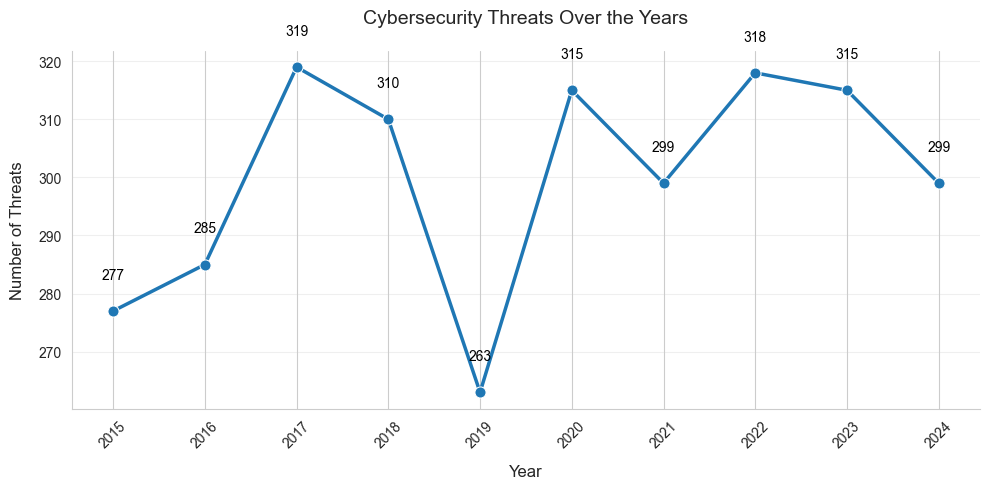

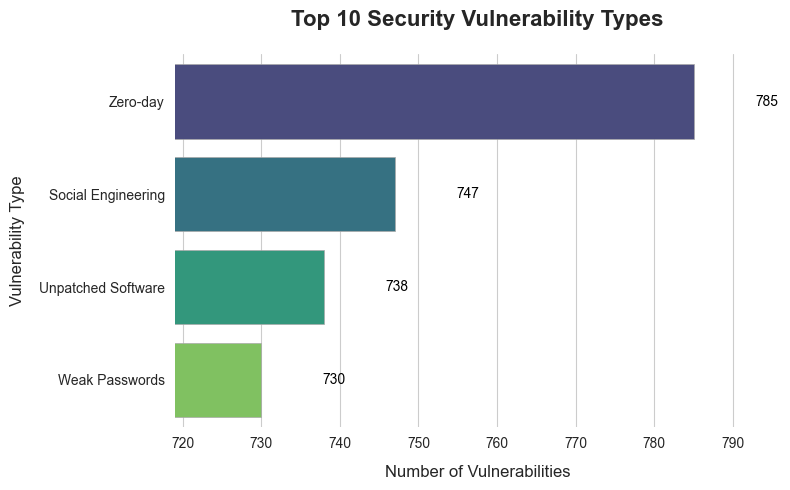

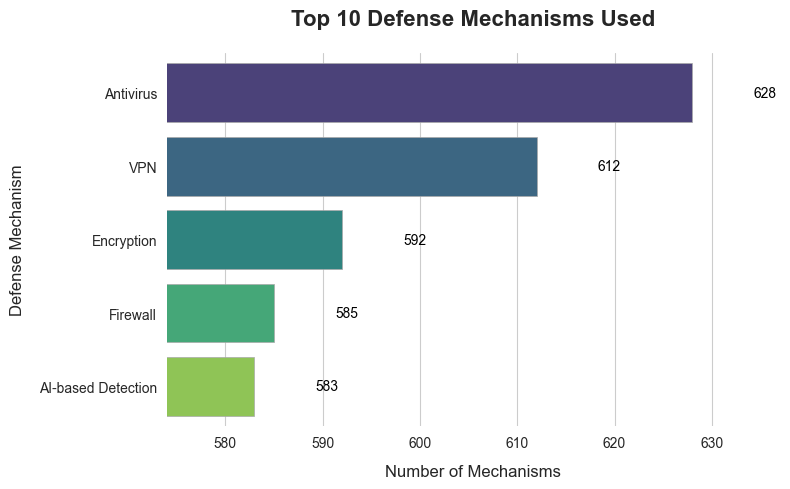

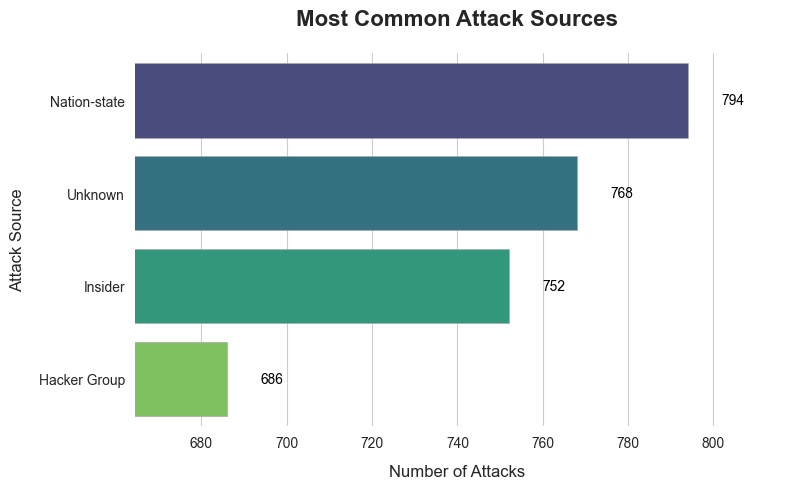

In [7]:
sns.set_style("whitegrid") 
plt.rcParams['figure.facecolor'] = 'white'  

def plot_elegant_barh(series, title, xlabel, ylabel, figsize=(8,5), top_n=None, xlim=None):
    if top_n is not None:
        data = series.value_counts().head(top_n)
    else:
        data = series.value_counts()
    
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=data.values, y=data.index, hue=data.index,
                    edgecolor='darkgray', linewidth=0.5,
                    palette="viridis", legend=False)
    
    # Annotazioni
    for i, v in enumerate(data.values):
        ax.text(v + max(data.values)*0.01, i, f"{v:,}",
                color='black', ha='left', va='center', fontsize=10)
    
    plt.title(title, fontsize=16, pad=20, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12, labelpad=10)
    plt.ylabel(ylabel, fontsize=12, labelpad=10)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    ax.axvline(0, color='gray', linewidth=0.5)
    plt.gca().margins(y=0.03)
    
    # Calcola xlim se non è passato
    if xlim is None:
        max_val = max(data.values)
        min_val = min(data.values)
        # Se i valori sono vicini, restringi il range attorno a min e max
        delta = (max_val - min_val) * 0.2  # margine del 20%
        xlim = (min_val - delta, max_val + delta)
    
    plt.xlim(xlim)
    
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()


def plot_elegant_line(series, title, xlabel, ylabel, figsize=(10,5)):
    data = series.value_counts().sort_index()
    
    plt.figure(figsize=figsize)
    ax = sns.lineplot(x=data.index, y=data.values, 
                     marker='o', markersize=8, linewidth=2.5)
    
    for x, y in zip(data.index, data.values):
        ax.text(x, y+5, str(y), color='black', ha='center', va='bottom')
    
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel(xlabel, fontsize=12, labelpad=10) #da sistemare per visualizzazione da cellulare
    plt.ylabel(ylabel, fontsize=12, labelpad=10)
    
    plt.xticks(data.index, rotation=45)
    
    sns.despine()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
#plt calls

plot_elegant_barh(df["Country"], 
                 "Top 10 Countries with Cybersecurity Threats", 
                 "Number of Threats", 
                 "Country",
                  xlim=(275,325),
                 top_n=10)

plot_elegant_barh(df["Attack Type"], 
                 "Distribution of Attack Types", 
                 "Number of Attacks", "Attack Type")

plot_elegant_barh(df["Target Industry"], 
                 "Top 10 Targeted Industries", 
                 "Number of Attacks", "Target Industry", top_n=10)

plot_elegant_line(df["Year"], 
                 "Cybersecurity Threats Over the Years", 
                 "Year", "Number of Threats")

plot_elegant_barh(df["Security Vulnerability Type"], 
                 "Top 10 Security Vulnerability Types", 
                 "Number of Vulnerabilities", "Vulnerability Type", top_n=10)

plot_elegant_barh(df["Defense Mechanism Used"], 
                 "Top 10 Defense Mechanisms Used", 
                 "Number of Mechanisms", "Defense Mechanism", top_n=10)

plot_elegant_barh(df["Attack Source"], 
                 "Most Common Attack Sources", 
                 "Number of Attacks", "Attack Source")

# Riassumendo dai grafici sopra

#### 1. Paesi più attaccati

1) Gran Bretagna
2) Brasile
3) India
4) Giappone
5) Francia
6) Australia
...

#### 2. Metodi più utilizzati (ed efficaci)

1) Attacchi DDoS
2) Phishing
3) SQL injection
4) Ransomware
5) Malware
6) Attacchi MitM

#### 3. Settori lavorativi più attaccati

1) Area IT (settore informatico)
2) Bancario
3) Salute
4) Vendite
5) Educazione (scuole, biblioteche, università)
6) Governo

#### 4. Gli anni con più attacchi

1) 2017
2) 2022
3) 2020 e 2023

#### 5. Vulnerabilità più utilizzate

1) Zero-day
2) Social-engineering
3) Software non aggiornato
4) Password deboli

#### 6. Sistemi di mitigazione più usati

1) Antivirus
2) VPN
3) Cifratura
4) Firewall
5) Rilevamento basato su IA

#### 7. Fonti più comuni degli attacchi

1) Nazioni/stati
2) Sconosciuto (molto probabilmente individui in gruppo o singoli non conosciuti)ù
3) Insiders
4) Gruppi hacker

## Trend annuali di utenti affetti

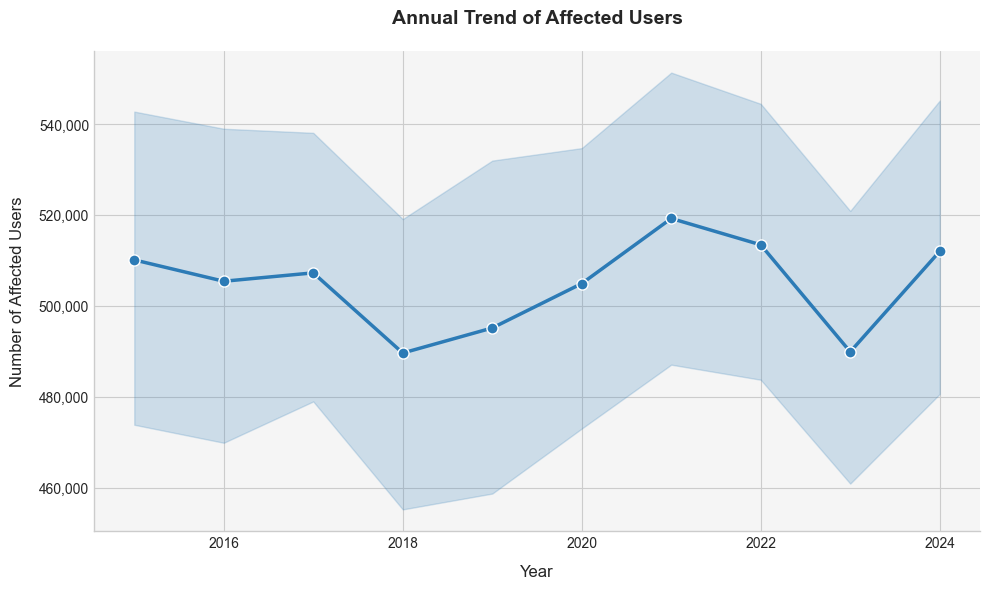

In [8]:
plt.figure(figsize=(10, 6), dpi=100) 
plt.style.use('seaborn-v0_8-whitegrid')

ax = sns.lineplot(
    x="Year", 
    y="Number of Affected Users", 
    data=df, 
    color='#2c7bb6',
    linewidth=2.5,
    marker='o',
    markersize=8,
    markeredgecolor='white',
    markeredgewidth=1
)

plt.title("Annual Trend of Affected Users", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Year", fontsize=12, labelpad=10)
plt.ylabel("Number of Affected Users", fontsize=12, labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

if len(df) <= 15:
    for x, y in zip(df["Year"], df["Number of Affected Users"]):
        ax.text(x, y, f"{y:,}", 
                color='#2c7bb6', 
                fontsize=9, 
                ha='center', 
                va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

Nel 2021 c'è stato l'apice del numero di utenti attaccati direttamente o influenzati indirettamente con quasi 520.000 persone affette.

## N° attachi per paese

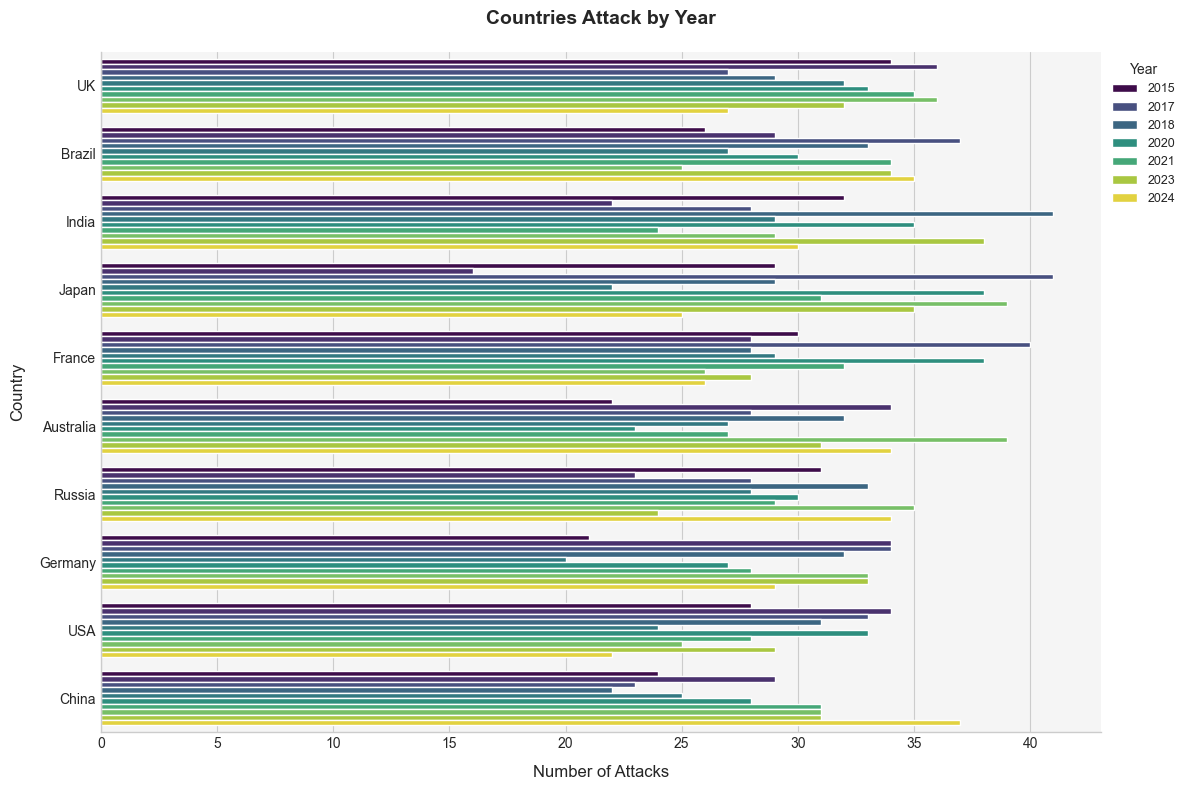

In [9]:
sns.set_style("whitegrid")
sns.set_palette("pastel")  
plt.rcParams['figure.facecolor'] = 'white' 

plt.figure(figsize=(12, 8)) #dimensioni maggiori per maggiore chiarezza

#countplot
ax = sns.countplot(
    data=df, 
    y="Country", 
    order=df["Country"].value_counts().index, 
    hue="Year", 
    palette="viridis"
)

plt.title("Countries Attack by Year", fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Number of Attacks", fontsize=12, labelpad=10)
plt.ylabel("Country", fontsize=12, labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 1), fontsize=9, title_fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()

# Distribuzioni e fit

Procediamo ora con l’analisi dei dati mediante grafici a colonne, al fine di stimare una linea di tendenza (fit) che rappresenti al meglio l’andamento osservato.

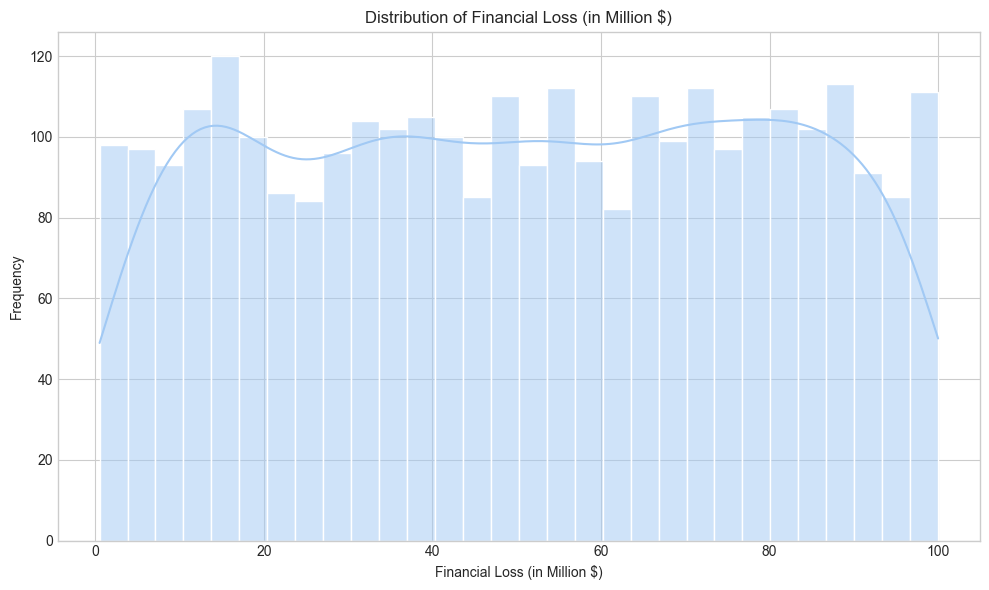

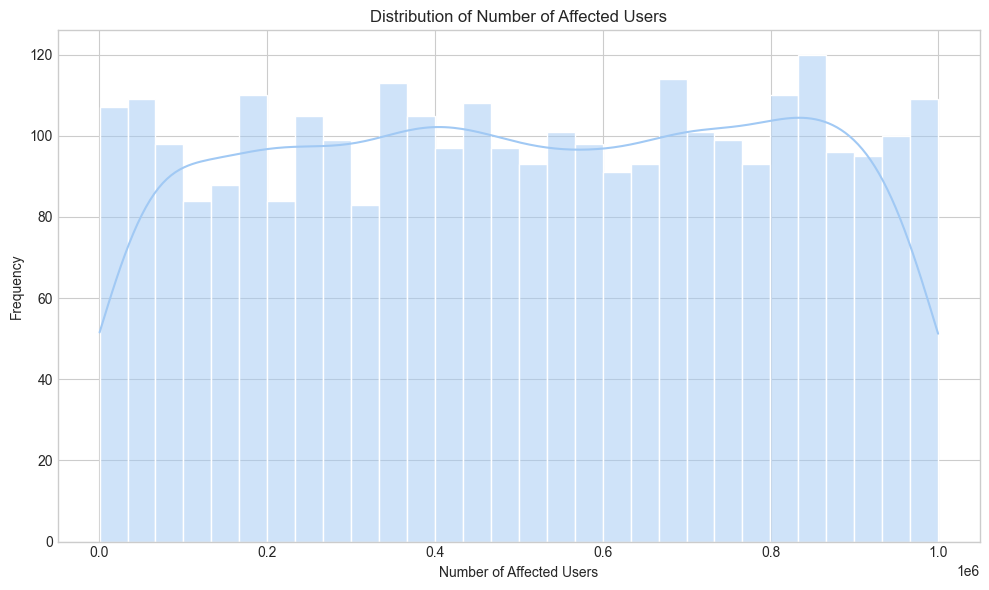

In [10]:
cols = ['Financial Loss (in Million $)', 'Number of Affected Users']

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Statisticamente parlando, guardando la linea di fit, potremmo dire che, in entrambi i grafici, gli eventi ed i dati tratti dal dataset seguano una _distribuzione_ **uniforme** oppure detta **multimodale piatta**. Ce lo conferma l'immagine sottostante.

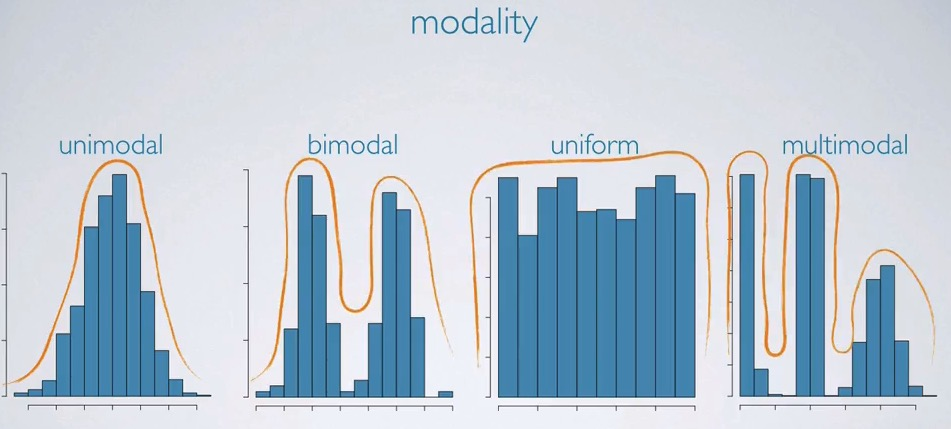

---

# Previsioni future

Usiamo la libreria sklearn per applicare un modello di approssimazione supervisionato al nostro dataset con lo scopo di individuare quali saranno i trend futuri.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

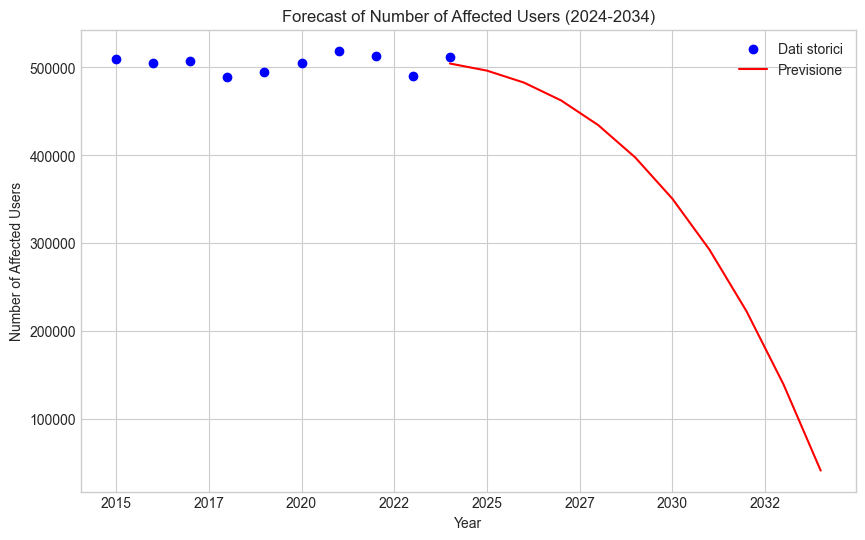

Previsione per il periodo 2024-2034:
    Year  Predicted Affected Users
0   2024                    504487
1   2025                    496364
2   2026                    482704
3   2027                    462393
4   2028                    434322
5   2029                    397380
6   2030                    350453
7   2031                    292433
8   2032                    222206
9   2033                    138662
10  2034                     40689
R²: 0.1683


In [13]:
yearly_data = df.groupby('Year')['Number of Affected Users'].mean().reset_index()

X = yearly_data['Year'].values.reshape(-1, 1)
y = yearly_data['Number of Affected Users'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

future_years = np.arange(2024, 2035).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
predictions = model.predict(future_years_poly)

results = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Affected Users': predictions.round(0).astype(int)
})
#plot show
plt.figure(figsize=(10, 6))
plt.scatter(yearly_data['Year'], yearly_data['Number of Affected Users'], color='blue', label='Dati storici')
plt.plot(future_years, predictions, color='red', label='Previsione')
plt.title('Forecast of Number of Affected Users (2024-2034)')
plt.xlabel('Year')
plt.ylabel('Number of Affected Users')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}')) #toglie gli anni come float
plt.show()

#=====print valori utili=====#

print("Previsione per il periodo 2024-2034:")
print(results)
y_pred = model.predict(X_poly)

#calcolo R^2
r2 = r2_score(y, y_pred)
print(f"R²: {r2:.4f}")

R^2 indica il coefficiente di determinazione, in altre parole, quanto preciso è il nostro modello di previsione. Nel nostro caso abbiamo ottenuto un 16,8%, quasi 17%. Il modello non è preciso, probabilmente per la scarsa quantità di dati come risorsa.

---